In [1]:
# Read all JSON/NDJSON files under outputs, merge into a DataFrame and plot key metrics
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output

def plot_train_metric_from_files(data_path_lis):
    data_lis = []
    dataset_labels = [Path(p).parent.name or Path(p).stem for p in data_path_lis]

    #print('start loading data from list')
    for data_path in data_path_lis:
        data = pd.read_json(data_path, lines=True)
        data_lis.append(data)

    if not data_lis:
        raise ValueError('No data loaded. Please check the provided paths.')

    #print(data_lis[0].keys())

    plot_start = 5  # skip the first point which is usually very high loss
    plot_end = -1
    end_slice = plot_end if plot_end != -1 else None

    metrics = ['lr', 'total_loss', 'dino_local_crops_loss', 'dino_global_crops_loss', 'koleo_loss', 'ibot_loss']
    metrics = list(data_lis[0].keys())[1:]
    n = len(metrics)
    #print('start plotting')
    import math
    rows = math.ceil(n / 3)
    fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 3 * rows), sharex=True, constrained_layout=True)
    axes = axes.flatten()

    for ax, metric in zip(axes, metrics):
        legend_handles = []
        legend_labels = []
        for i, d in enumerate(data_lis):
            if metric in d.columns:
                try:
                    label = dataset_labels[i]
                    x_vals = d['iteration'][plot_start:end_slice]
                    y_vals = d[metric][plot_start:end_slice]
                    (line,) = ax.plot(
                        x_vals,
                        y_vals,
                        marker='o',
                        markersize=2,
                        linewidth=1,
                        label=label,
                        alpha=0.4,
                    )
                    legend_handles.append(line)
                    legend_labels.append(label)
                except Exception:
                    continue
                    # print(f"Error plotting {metric}: {e}")
        ax.set_ylabel(metric)
        if legend_handles:
            order = {label: idx for idx, label in enumerate(dataset_labels)}
            sorted_items = sorted(
                zip(legend_handles, legend_labels),
                key=lambda item: order.get(item[1], float('inf')),
            )
            handles, labels = zip(*sorted_items)
            ax.legend(handles, labels)
        else:
            ax.legend()
        ax.grid(True)

    axes[-1].set_xlabel('Iteration')
    plt.show()

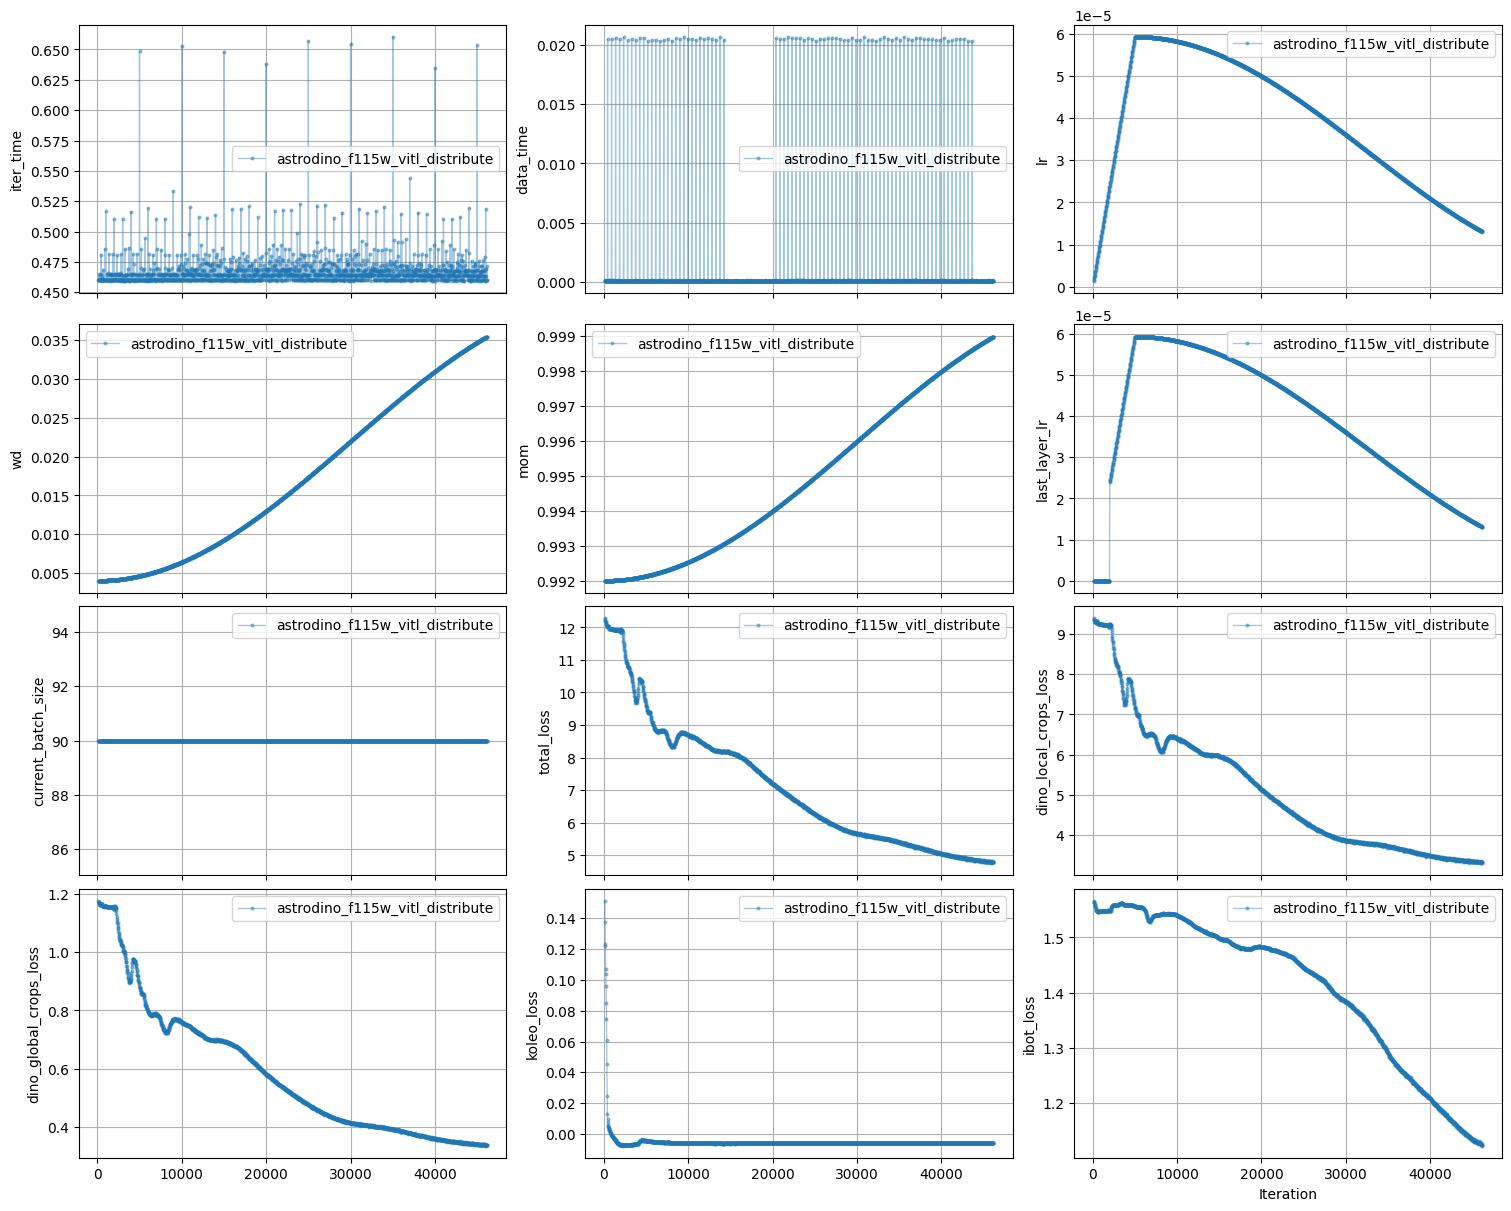

In [6]:
data_list =[ 
             #"AstroCLIP/outputs/astroclip_image/astrodino_desi_vitl/training_metrics.json",
             #"AstroCLIP/outputs/astroclip_image/astrodino_desi_vitb/training_metrics.json",
             #"AstroCLIP/outputs/astroclip_image/astrodino_f115w_vitl/training_metrics.json",
             #"AstroCLIP/outputs/astroclip_image/astrodino_f115w_vitl_var/training_metrics.json",
             "AstroCLIP/outputs/astroclip_image/astrodino_f115w_vitl_distribute/training_metrics.json",
]
plot_train_metric_from_files(data_list)

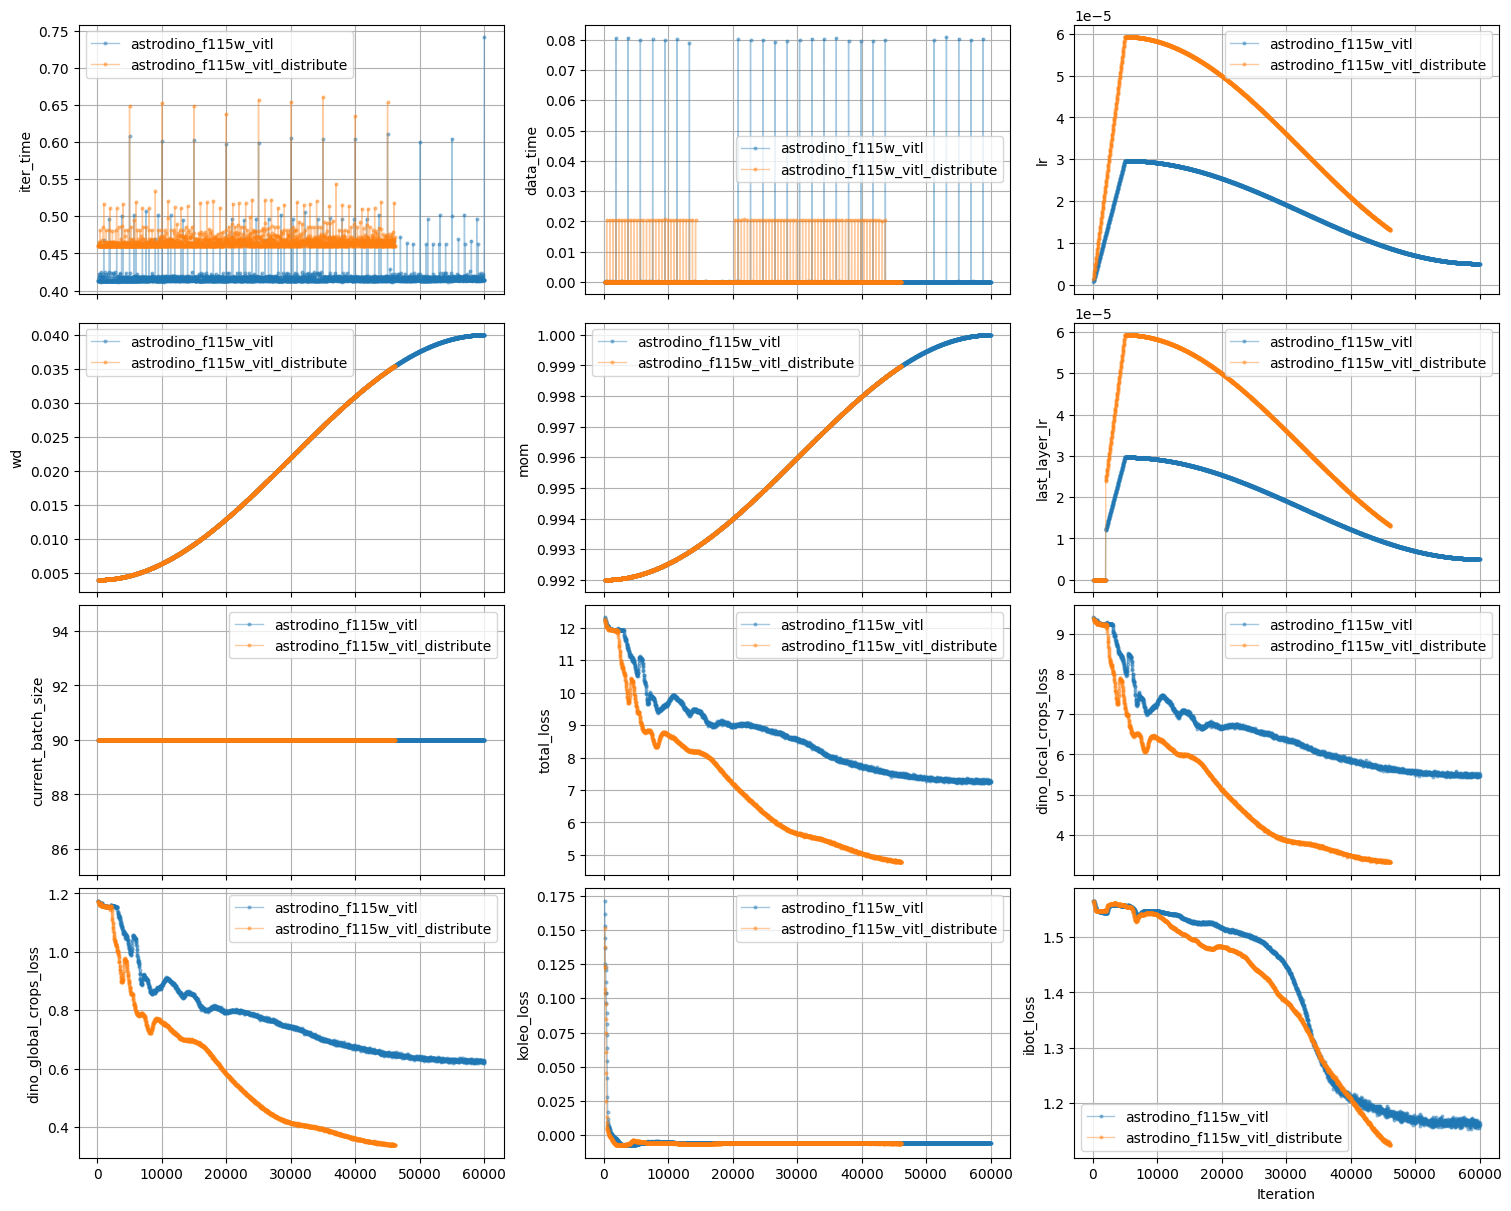

KeyboardInterrupt: 

In [7]:
from tqdm.auto import tqdm
data_list = [ "/ptmp/yacheng/outthere_ssl/AstroCLIP/outputs/astroclip_image/astrodino_f115w_vitl/training_metrics.json",
            "/ptmp/yacheng/outthere_ssl/AstroCLIP/outputs/astroclip_image/astrodino_f115w_vitl_distribute/training_metrics.json",]
plot_time = (4 * 3600)
plot_step = (2)
for plot in tqdm(range(int(plot_time/plot_step))):
    print(f'{plot} th plot')
    clear_output(wait=True)
    plot_train_metric_from_files(data_list)
    time.sleep(plot_step)

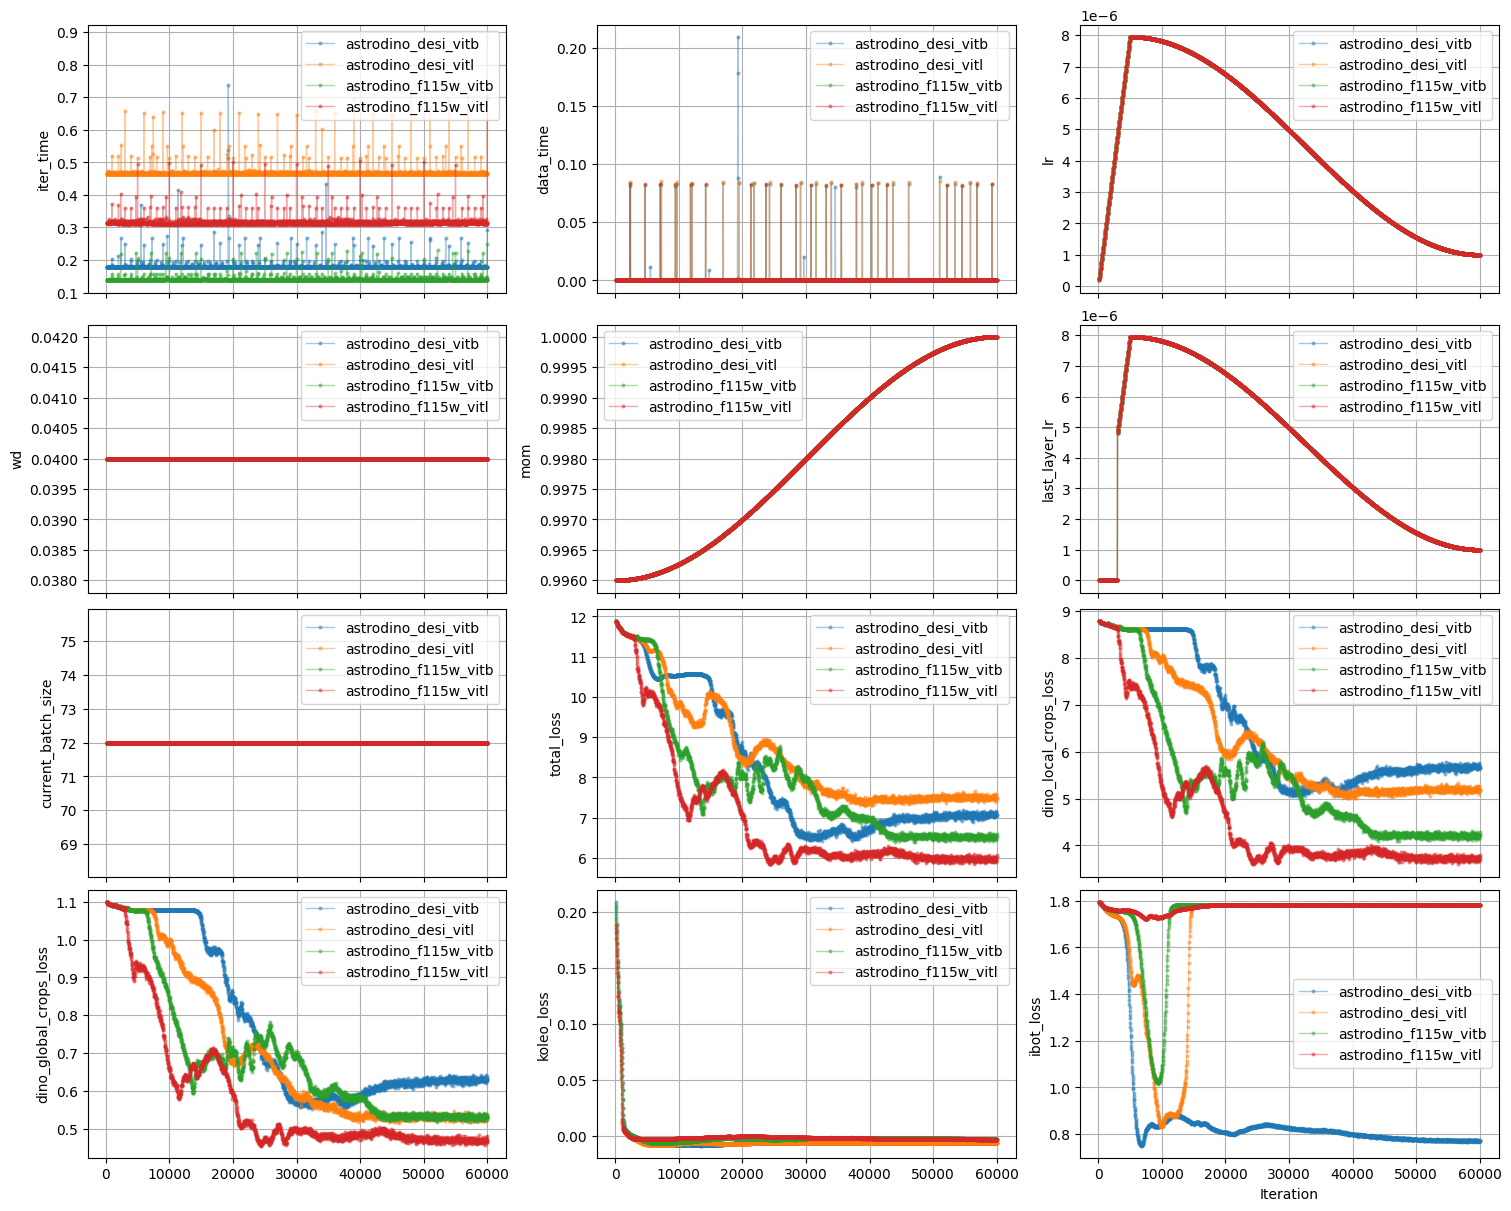

notes for the talk on accretion physics

koray Lenkeit


introduction to accretion physics energy-radiation processes

well structured outline + introduction General information on how and why acrretion happens 

Thin disk:
detailed mathematical formulation of disk height, motivatted by hydrostatic equillibrium and gas particle inflow, viscous spreading, alpha disk model and temperature model.

Comparison CV observations with theory: Stefan Boltzmann temperature.

Eddington flows:

great motivation and explanation of Eddingtom flow, super-Eddington accretion's role in maintaining smbh.

physics picture of slim vs thick disk, effects of accretion time scale + effective cooling -> efficiency loss 

conclusion: DIFFERENT SCENARIOS OF ACCRETION PHYSICS in slim thin, thick disks advections

good:
clear and good looking figures + references
great transitions between different topics like thin to slim/thick disks and great comparison between different scenarios

different concepts well explained with physical motivation

great speed and time control

great summary at the end of each different sections

improvements:

maybe too much math equations on the slides, not all of them are explained but simply stayed there, could be simplified. I don't think this really helps the audience to understand the concepts better. 

lack of connections/description of some figures in the talk: some theoretical simulated images, e.g. the simulated shape of slim/thick disks are not explained in the talk.


maybe more links with real observations, like how do we know slim/thick disks are good models for smbh accretion.

